In [ ]:
!pip install audiosegment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.2/66.2 kB 3.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for webrtcvad: filename=webrtcvad-2.0.10-cp39-cp39-linux_x86_64.whl size=80900 sha256=04ba290a72027e05f6d657226e9cd700a83b52ec6974a0e832f86419d92e0f56
  Stored in directory: /root/.cache/pip/wheels/1f/fe/28/e8f0d5847ae2642b49fa974db1cea44d59ab59d0251c12f17b
Successfully built webrtcvad


In [ ]:
import audiosegment
import matplotlib.pyplot as plt
import numpy as np
import cv2
import os


In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
f=('/content/drive/MyDrive/audio')


In [ ]:
#preprocessing of audio
def load_audio(folder):
  audio=[]
  for i in os.listdir(folder):
    seg = audiosegment.from_file(os.path.join(folder,i))
    freqs, times, amplitudes = seg.spectrogram(window_length_s=0.03, overlap=0.5)
    amplitudes = 10 * np.log10(amplitudes + 1e-9)
    plt.pcolormesh(times, freqs, amplitudes)
    plt.savefig(f"/content/drive/MyDrive/spectograms/{i}_spec.png")
    # plt.show()



Spectograms are visual represntation of spectrum of frequencies of a signal over time.

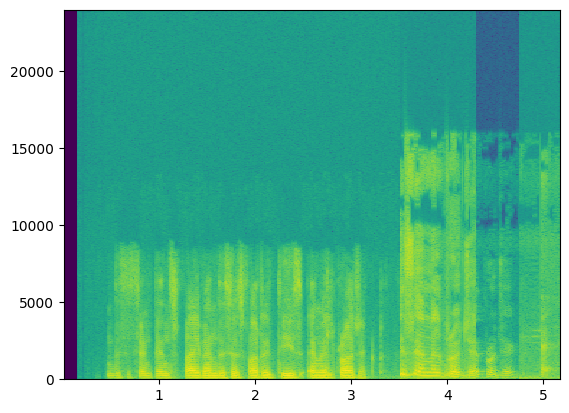

In [ ]:
load_audio(f)

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
# !pip install librosa

In [ ]:
# import librosa

In [ ]:
# def read_audio_from_filename(filename):
#     audio, sr = librosa.load(filename)
#     D = np.abs(librosa.stft(audio))**2
#     audio= librosa.feature.melspectrogram(y=audio, sr=sr, S=D)
#     return audio

In [ ]:
# load_audio(f)

In [ ]:
def load_img(folder):
  img=[]
  for i in os.listdir(folder):
    img1=cv2.imread(os.path.join(folder,i))
    img1=cv2.cvtColor(img1,cv2.COLOR_RGB2GRAY)
    img1=cv2.resize(img1,(214,224))
    img.append(img1)

  return img


In [ ]:
load_img('/content/drive/MyDrive/spectograms')

[array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        ...,
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255]], dtype=uint8),
 array([[255, 255, 255, ..., 255, 255, 255],
        [255, 255, 255, ..., 255, 255, 255],
        [255, 25

In [ ]:
def get_arrays(folder):
  arrays=np.array(load_img(folder))
  # arrays=np.reshape(arrays,(arrays.shape[0],arrays.shape[1]*arrays.shape[2]))
  arr=[]
  for i in range(len(arrays)):
    arr.append(arrays[i].reshape(-1,1))
  arr=np.squeeze(arr)

  return np.array(arr)

In [ ]:
x=get_arrays("/content/drive/MyDrive/spectograms")

NameError: ignored

In [ ]:
#0 anisha
#1 anushkaa
#2 Ayush
#3 Mumma
#4 Nihar
#5 Papa
#6 Pranya
#7 Samarth
#8 yash

y=np.array([0]5*+[1]*5+[2]*5+[3]*5+[4]*5+[5]*5+[6]*5+[7]*5+[8]*5)

In [ ]:

y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 4, 4,
       4, 4, 4, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 7, 7, 7, 7, 7, 8, 8, 8, 8,
       8])

In [ ]:
x.shape

(45, 65536)

In [ ]:
#scaling data or standarizing data
from sklearn.preprocessing import StandardScaler
se=StandardScaler()
x=se.fit_transform(x)


In [ ]:
from sklearn.decomposition import PCA
pca=PCA(0.90)
pca.fit(x)
pc=pca.transform(x)


In [ ]:
pc.shape,y.shape

((45, 13), (45,))

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test=train_test_split(pc, y, train_size=0.7)

In [ ]:
# import pickle

# pickle_out=open("pca.pkl","wb")
# pickle.dump(pca,pickle_out)
# pickle_out.close()

In [ ]:
from keras import models,layers

In [ ]:
network=models.Sequential()
network.add(layers.Dense(512,activation='LeakyReLU'))
network.add(layers.Dense(128,activation='tanh'))
network.add(layers.Dense(9,activation='softmax'))
# network.summary()

In [ ]:
network.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])


In [ ]:
network.fit(X_train,y_train.reshape(-1,1),epochs=50)

Epoch 1/50
1/1 [==============================] - 1s 636ms/step - loss: 3.0404 - accuracy: 0.0323
Epoch 2/50
1/1 [==============================] - 0s 13ms/step - loss: 1.5637 - accuracy: 0.3871
Epoch 3/50
1/1 [==============================] - 0s 14ms/step - loss: 1.0090 - accuracy: 0.8065
Epoch 4/50
1/1 [==============================] - 0s 16ms/step - loss: 0.7220 - accuracy: 0.8387
Epoch 5/50
1/1 [==============================] - 0s 11ms/step - loss: 0.6049 - accuracy: 0.9032
Epoch 6/50
1/1 [==============================] - 0s 14ms/step - loss: 0.4905 - accuracy: 0.9032
Epoch 7/50
1/1 [==============================] - 0s 19ms/step - loss: 0.4504 - accuracy: 0.9032
Epoch 8/50
1/1 [==============================] - 0s 12ms/step - loss: 0.4071 - accuracy: 0.9032
Epoch 9/50
1/1 [==============================] - 0s 13ms/step - loss: 0.3660 - accuracy: 0.9032
Epoch 10/50
1/1 [==============================] - 0s 15ms/step - loss: 0.3422 - accuracy: 0.9032
Epoch 11/50
1/1 [===========

In [ ]:
network.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               7168      
                                                                 
 dense_1 (Dense)             (None, 128)               65664     
                                                                 
 dense_2 (Dense)             (None, 9)                 1161      
                                                                 
Total params: 73,993
Trainable params: 73,993
Non-trainable params: 0
_________________________________________________________________


In [ ]:
preds=network.predict(X_train)
# preds=network.predict(X_train[0].reshape(1,-1))

# print(preds)
preds=np.argmax(preds,axis=1)
# print(preds)


1/1 [==============================] - 0s 91ms/step


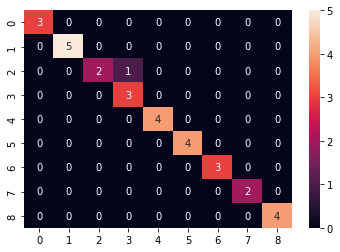

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix,accuracy_score
sns.heatmap(confusion_matrix(y_train,preds),annot=True)

In [ ]:
accuracy_score(y_train,preds)

0.967741935483871

In [ ]:
test_preds=network.predict(X_test)
test_preds=np.argmax(test_preds,axis=1)

1/1 [==============================] - 0s 19ms/step


In [ ]:
test_preds

array([6, 3, 0, 2, 6, 4, 3, 7, 7, 2, 3, 8, 6, 1])

In [ ]:
y_test

array([7, 4, 0, 0, 6, 5, 3, 7, 7, 2, 3, 8, 6, 2])

In [ ]:
person={
    0: 'anisha',
    1: 'anushkaa',
    2: 'Ayush',
    3: 'Mumma',
    4: 'Nihar',
    5: 'Papa',
    6: 'Pranya',
    7: 'Samarth',
    8: 'yash',
}

for i in range(len(test_preds)):
  print(f"Actual person: {person[y_test[i]]}; Predicted person: {person[test_preds[i]]}")

Actual person: Samarth; Predicted person: Pranya
Actual person: Nihar; Predicted person: Mumma
Actual person: anisha; Predicted person: anisha
Actual person: anisha; Predicted person: Ayush
Actual person: Pranya; Predicted person: Pranya
Actual person: Papa; Predicted person: Nihar
Actual person: Mumma; Predicted person: Mumma
Actual person: Samarth; Predicted person: Samarth
Actual person: Samarth; Predicted person: Samarth
Actual person: Ayush; Predicted person: Ayush
Actual person: Mumma; Predicted person: Mumma
Actual person: yash; Predicted person: yash
Actual person: Pranya; Predicted person: Pranya
Actual person: Ayush; Predicted person: anushkaa


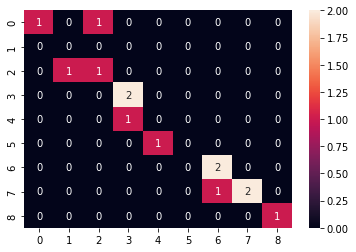

In [ ]:
sns.heatmap(confusion_matrix(y_test,test_preds),annot=True)

In [ ]:
accuracy_score(y_test,test_preds)


0.6428571428571429